In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

%matplotlib inline

## Practice cells:

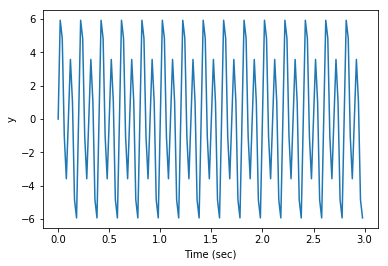

In [4]:
f_s = 50.0 # Hz
f = 1.0 # Hz
time = np.arange(0.0, 3.0, 1/f_s)
y = 5 * np.sin(10 * 2 * np.pi * f * time) + 2 * np.sin(5 * 2 * np.pi * f * time)

plt.plot(time, y)
plt.xlabel("Time (sec)")
plt.ylabel("y")
plt.show()

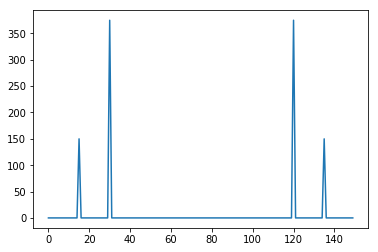

In [5]:
fft_y = np.fft.fft(y)
n = len(fft_y)
freq = np.fft.fftfreq(n, 1/f_s)

plt.plot(np.abs(fft_y))

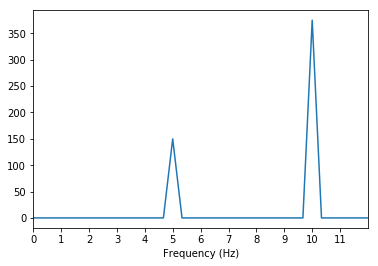

In [6]:
fft_y_shifted = np.fft.fftshift(fft_y)
freq_shifted = np.fft.fftshift(freq)

plt.plot(freq_shifted, np.abs(fft_y_shifted))
plt.xlabel("Frequency (Hz)")
plt.xlim(0,12)
plt.xticks(np.arange(0,12, step=1))

plt.show()

## Running FFT Tests:

## Step 1: Recreating wave from subexperiment1.

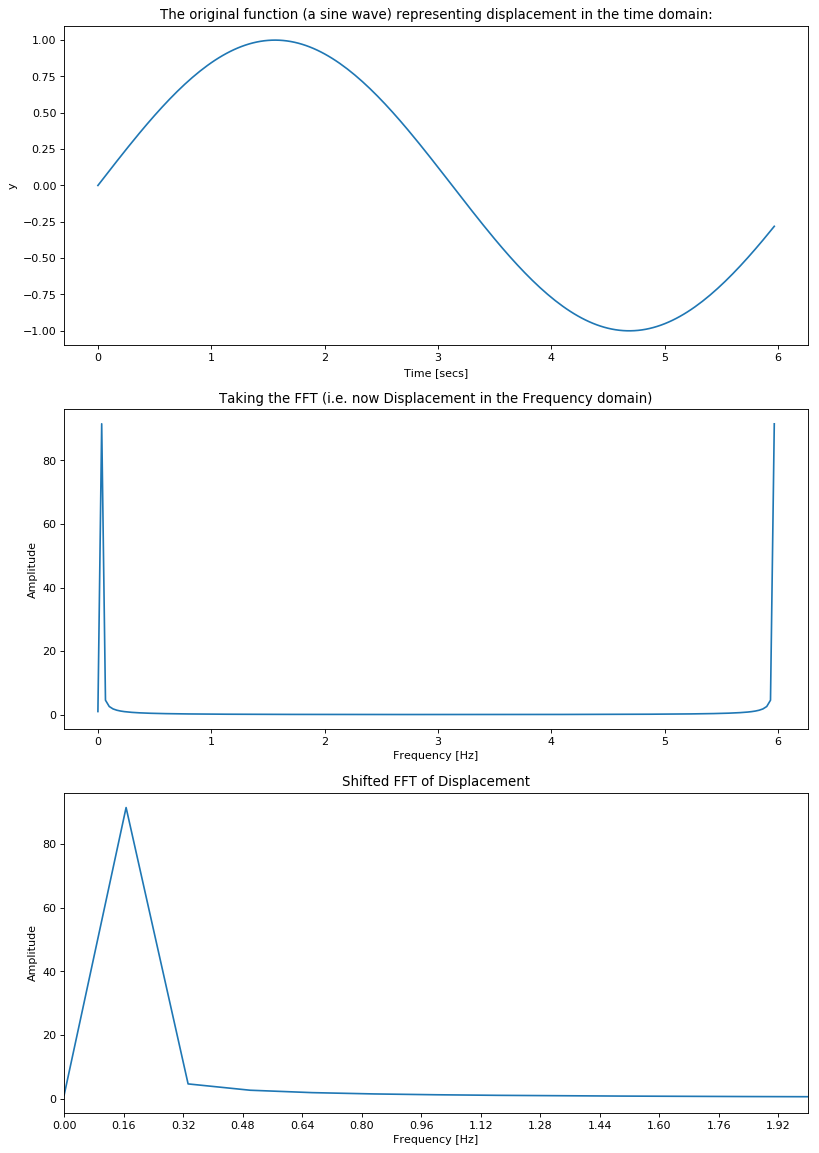

These results make sense actually, since we would expect the FFT to have a peak near 0.16 for this sine wave.


In [7]:
#Step 1:
#Create a normal sine wave (like subexperiment 1) as the displacement over time.
#Amplitude: 1m
#Period: 6 secs --> 1/6 = 0.16 frequency

#Creating the sine wave:
f_s = 30.0 # Hz
f = 0.16 # Hz
time = np.arange(0.0, 6.0, 1/f_s)
y = np.sin(2 * np.pi * f * time) 


##Taking the FFT of the sine wave:
fft_y = np.fft.fft(y)
n = len(fft_y)
freq = np.fft.fftfreq(n, 1/f_s)
#plt.plot(np.abs(fft_y))



##Shifting the results of the FFT:
fft_y_shifted = np.fft.fftshift(fft_y)
freq_shifted = np.fft.fftshift(freq)


#Plotting the results:

fig = plt.figure(num=None, figsize=(12, 18), dpi=80, facecolor='w', edgecolor='k')

# Returns the Axes instance
ax = fig.add_subplot(311) 
ax1 = fig.add_subplot(312) 
ax2 = fig.add_subplot(313) 

ax.plot(time, y) #Plotting the first derivative
ax.set_title('The original function (a sine wave) representing displacement in the time domain:')
ax.set_xlabel('Time [secs]')
ax.set_ylabel("y")


ax1.plot(time, np.abs(fft_y)) 
ax1.set_title('Taking the FFT (i.e. now Displacement in the Frequency domain)')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Amplitude')

ax2.plot(freq_shifted, np.abs(fft_y_shifted))
ax2.set_title('Shifted FFT of Displacement')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Amplitude')
plt.xlim(0,2)
plt.xticks(np.arange(0,2, step=.16))


plt.show()

print("These results make sense actually, since we would expect the FFT to have a peak near 0.16 for this sine wave.")

## Step 2: Double derivative to get acceleration.

## Using gradient (instead of interpolation) works, and returns an array:

The graphs of the first and second derivates of the sine function:


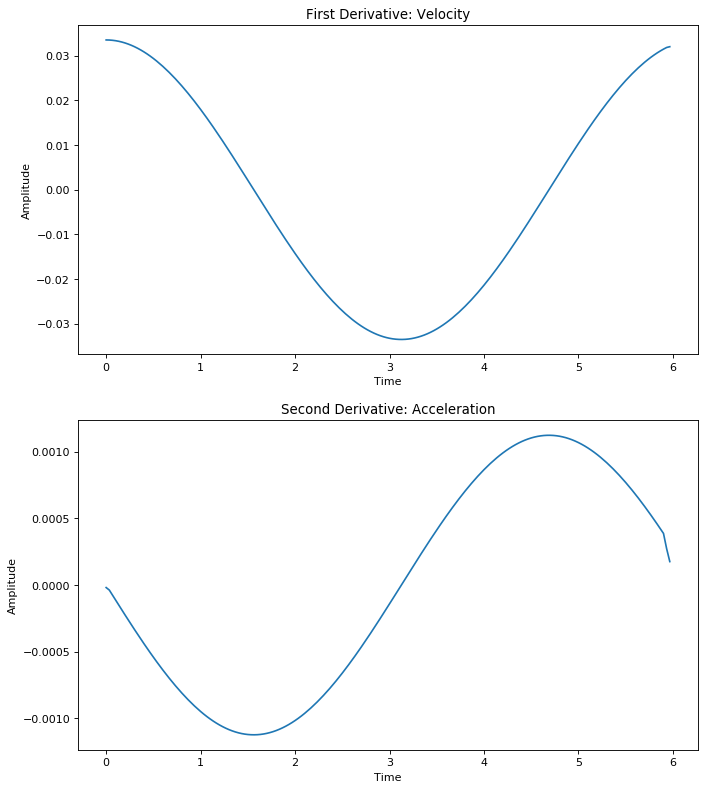

In [8]:
#Trying to do the same experiment, but in a way where 
#we get an array returned so that we can take the FFT later:

print("The graphs of the first and second derivates of the sine function:")

fp = np.gradient(y)
fpp = np.gradient(fp)

#Plotting the results:

fig = plt.figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')

# Returns the Axes instance
ax = fig.add_subplot(211) 
ax1 = fig.add_subplot(212) 

ax.plot(time, fp) #Plotting the first derivative
ax.set_title('First Derivative: Velocity')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')


ax1.plot(time, fpp) # plotting the 2nd derivative
ax1.set_title('Second Derivative: Acceleration')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

plt.show()

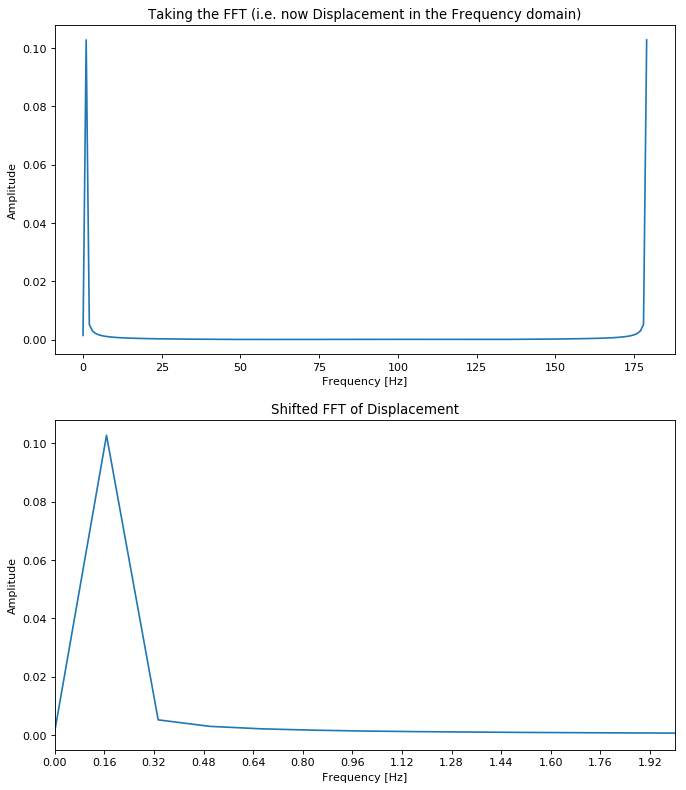

This is the output after shifting the FFT of the second derivative 
 i.e. the FFT of acceleration:


In [17]:
#fpp is the second derivative, take the fft:


#Taking the FFT of ffp (the second derivative i.e. acceleration):
fft_fpp = np.fft.fft(fpp)
n_fpp = len(fft_fpp)
freq_fpp = np.fft.fftfreq(n_fpp, 1/f_s)


#Shifting the FFT of acceleration:
fft_fpp_shifted = np.fft.fftshift(fft_fpp)
freq_fpp_shifted = np.fft.fftshift(freq_fpp)


#Plotting the results:

fig = plt.figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')

# Returns the Axes instance
ax1 = fig.add_subplot(211) 
ax2 = fig.add_subplot(212) 


ax1.plot(np.abs(fft_fpp))
ax1.set_title('Taking the FFT (i.e. now Displacement in the Frequency domain)')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Amplitude')

ax2.plot(freq_fpp_shifted, np.abs(fft_fpp_shifted))
ax2.set_title('Shifted FFT of Displacement')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Amplitude')
plt.xlim(0,2)
plt.xticks(np.arange(0,2, step=.16))


plt.show()

print("This is the output after shifting the FFT of the second derivative \n i.e. the FFT of acceleration:")






/Users/jasminesimmons/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


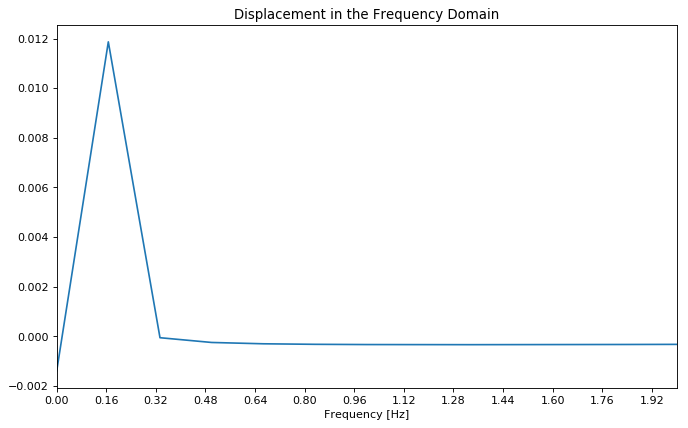

In [28]:
#Now, multiply the accelerations by 1/w^2 to get the displacement in the frequency domain:

w = 2*np.pi*f
omega = 1/w**2

new_list = []

for x in fft_fpp_shifted:
    new_x = x*omega
    new_list.append(new_x)
    
#for x,y in zip(fft_fpp_shifted, new_list):
#    print(x,y)

#So now new_list should have the new values, 
#representing displacement in the frequency domain.
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

# Returns the Axes instance
ax = fig.add_subplot(111) 


ax.plot(freq_fpp_shifted, new_list)
ax.set_title("Displacement in the Frequency Domain")
ax.set_xlabel('Frequency [Hz]')
plt.xlim(0,2)
plt.xticks(np.arange(0,2, step=.16))

plt.show()



In [32]:
from scipy.integrate import simps
from scipy.integrate import cumtrapz
import math

#Print out the x-value corresponding to the FFT peak:
max_y = max(new_list)

for x,y in zip(freq_fpp_shifted, new_list):
    if y == max_y:
        print(x)
        
        
#Try to calculate significant wave height:

##Calculate the mean variance of the sea surface elevation, by taking the integral under the FFT curve
#We only want to integrate while fft_nfreq < 0.6:

def limit_frequency_range(fft_freq):
    ret_freq = []
    for x in fft_freq:
        if x < 0.6:
            ret_freq.append(x)
    return ret_freq

lim_freq1 = limit_frequency_range(freq_fpp_shifted)


#Need to make disp_spectra match length of newly limited frequency:
len1 = len(lim_freq1)

lim_dspectra1 = new_list[0:len1]

m0_1 = simps(y=lim_dspectra1, x=lim_freq1)

Hs1 = 4*math.sqrt(m0_1)


print("\n")
print("Calculating Significant Wave Heights:")
print("Expecting near 1m and got: ", Hs1, "[m]")

0.166666666667


Calculating Significant Wave Heights:
Expecting near 1m and got:  0.15761525567570894 [m]


/Users/jasminesimmons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part


## Analysis of Results:

In [23]:
print("I'm confused by these results because of the difference in the y-axis values.")

I'm confused by these results because of the difference in the y-axis values.


In [ ]:
#Summary/Rationale:

#Going to abandon trying to do calculations in the frequency 
#domain for now, since it appears that we would have to 
#figure out what the scaling factor is to accurately
#calculate displacement, which could be variable for each
#surf ride session.

#Instead, I'll just try to calculate displacement from
#acceleration directly via double integration and then
#use that for the PSD framework. 
